# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2020
#### Due : 7/01 (wednes)  11:59 PM [Through Black board]

## Assignment Credit

### Your assignments are 40% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 10%__
- __HW#3: 10%__
- __HW#4: 15%__

## Python Assingment HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
!pip install sklearn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem1. Regression Model
## -Amzon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [3]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('data/AMZN.csv')

In [4]:
raw_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [5]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [6]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####

   ##########################
    for i in range(lookback-1, len(col_data)-1):
        temp = list()
        for j in range(lookback):
            temp.append(col_data[i-(lookback-1-j)])
        x_datas.append(temp)
        y_datas.append(raw_data['Close'][i+1])
    
    print(np.array(x_datas).shape)
    #x_data = np.concatenate(x_datas,0)
    x_data = np.array(x_datas)
    y_data = np.asarray(y_datas)

    return x_data, y_data

In [7]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_datas

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_datas\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [8]:
def split_datas(x,y):
    ##### Your Code Here ####
    x_train = x[:-60]
    x_test = x[-60:]
    y_train = y[:-60]
    y_test = y[-60:]

    ###########################
    return x_train, x_test, y_train, y_test

In [9]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(5283, 5)


(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [10]:
x_train, x_test, y_train, y_test = split_datas(x, y)
print(x_train[0])
print(y_train[0])
x_train.shape, y_train.shape, x_test.shape, y_test.shape
x_test[:10], y_test[:10]

[1.958333 1.729167 1.708333 1.635417 1.427083]
1.395833


(array([[1461.76001 , 1448.689941, 1468.349976, 1482.920044, 1485.339966],
        [1448.689941, 1468.349976, 1482.920044, 1485.339966, 1500.      ],
        [1468.349976, 1482.920044, 1485.339966, 1500.      , 1521.949951],
        [1482.920044, 1485.339966, 1500.      , 1521.949951, 1511.97998 ],
        [1485.339966, 1500.      , 1521.949951, 1511.97998 , 1512.449951],
        [1500.      , 1521.949951, 1511.97998 , 1512.449951, 1493.449951],
        [1521.949951, 1511.97998 , 1512.449951, 1493.449951, 1500.25    ],
        [1511.97998 , 1512.449951, 1493.449951, 1500.25    , 1523.609985],
        [1512.449951, 1493.449951, 1500.25    , 1523.609985, 1537.640015],
        [1493.449951, 1500.25    , 1523.609985, 1537.640015, 1545.      ]]),
 array([1500.      , 1521.949951, 1511.97998 , 1512.449951, 1493.449951,
        1500.25    , 1523.609985, 1537.640015, 1545.      , 1551.859985]))

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [11]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    poly_reg = PolynomialFeatures(degree=poly_degree)
    X_train = poly_reg.fit_transform(x_train)
    X_test = poly_reg.fit_transform(x_test)
    model = linear_model.LinearRegression()
    model.fit(X_train,y_train)
    #model = make_pipeline(PolynomialFeatures(poly_degree), linear_model.LinearRegression())
    #model.fit(x_train,y_train)
    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(X_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(X_test), y_test))
    test_pred = model.predict(X_test)
    #return model.predict(X_train), y_train
    return test_pred, y_test

In [13]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=3, poly_degree=2)

(5285, 3)
MSE - Train 32.5771
MSE - Test 790.4253


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable : 'Close'       <br/>
Lookback : 11      <br/>
Poly_degree : 4       <br/>

### Problem 1-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

1. Overfitting의 경우 모델이 너무 과하게 학습이 돼서 데이터를 다 암기해버리는 경우로, training loss 보다 validation 이나 test set의 loss가 훨씬 큰 현상이다. High variance의 경우로 위에서는 train loss가 6보다 작게 되는 경우를 대입했을 때, train loss는 6 이하로 작지만, test set에 대한 loss는 엄청 커지게 된다. 이 경우가 overfit의 경우이다. Underfitting의 경우에는 모델이 너무 단순해 제대로 예측을 하지 못하는 경우로, training loss도 큰 경우이다. High bias의 경우로 위에서 Volume 같은 variable로 lookback = 2, poly_degree = 1로 했을 때 두 에러 모두 상당히 크게 나오게 되므로 underfit의 경우이다.

2. 단순히 training loss만을 줄인다면 모델이 overfit할 확률이 크므로 validation set이나 test set을 통해 모델이 학습하지 않은 data도 잘 예측하는지 확인을 해야한다. 즉, training loss만이 아닌 validation error나 test error 모두 낮추는걸 목표로 해야한다. 

### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [14]:
# TODO : Assign your best prediction for test data to best_pred

best_pred = test_pred

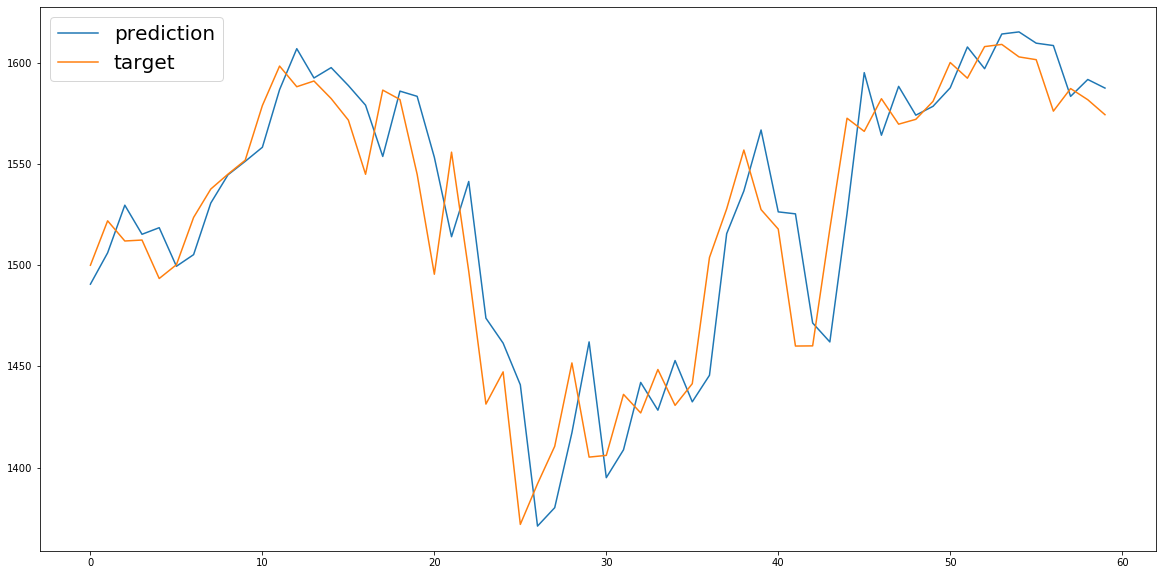

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem2. Regression Model
## -Covid Confirmed prediction.

In [16]:
#import covidall dataset 
train = pd.read_csv('data/train.csv')
all_data = pd.read_csv('data/covid_all.csv') #set your working directory
all_data

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,35677,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,109,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35678,35678,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,110,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35679,35679,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,111,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35680,35680,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,112,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


In [17]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

### <br/>Problem 2-1 Plot ' Spain' covid-Confiremedcases graph between march 1 to march 11.
- your completed graph doesn't have to be the same as the example.

Text(0.5, 1.0, 'Spain ConfirmedCases between days 39 and 49')

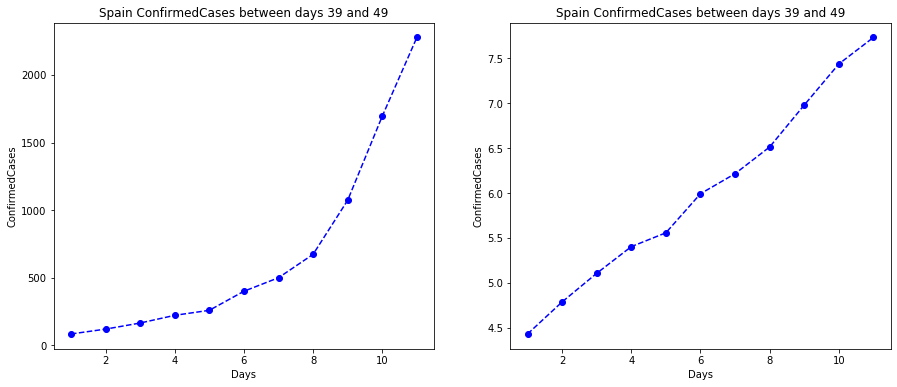

In [18]:

# plot 'Spain' covid-Confiremedcases graph between march 1 to march 11.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

vis = train.query('Country_Region == "Spain"')
vis = vis.query('Date >= "2020-03-01" and Date <= "2020-03-11"')
###To do####  
ax1.plot(range(1,12),vis['ConfirmedCases'], marker = 'o', linestyle = '--', color = 'b')
ax1.set_ylabel('ConfirmedCases')
ax1.set_xlabel('Days')
ax1.set_title('Spain ConfirmedCases between days 39 and 49')


## To do ###
##apply log transform to y variables ## 

ax2.plot(range(1,12),np.log(vis['ConfirmedCases']), marker = 'o', linestyle = '--', color = 'b')
ax2.set_ylabel('ConfirmedCases')
ax2.set_xlabel('Days')
ax2.set_title('Spain ConfirmedCases between days 39 and 49')





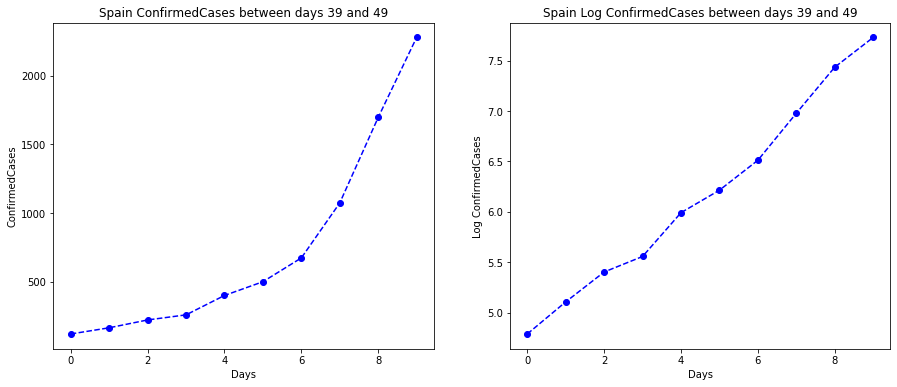

In [19]:
##don`t touch this cell##

# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)


### <br/>Problem 2-2  complete below function to  Split data into train/test and apply linear regression

In [20]:
#  Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    ##To do ## for Train set 
    x_train = df.query('ForecastId == "-1"')
    #x_train = df[df['Day_num']<=train_lim]
    y_train_1 = x_train['ConfirmedCases']
    y_train_2 = x_train["Fatalities"]
    x_train.drop('ConfirmedCases', inplace=True, errors='ignore', axis=1)
    x_train.drop('Fatalities', inplace=True, errors='ignore', axis=1)

    ##To do ## for  Test set
    x_test = df[len(x_train):]
    x_test.drop('ConfirmedCases', inplace=True, errors='ignore', axis=1)
    x_test.drop('Fatalities', inplace=True, errors='ignore', axis=1)

    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test #check to devide y_dataset 


# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    ##To do ##   Create linear regression object
    regr = linear_model.LinearRegression()

    ## To do ##  Train the model using the training sets
    regr.fit(X_train, Y_train)
    print(X_train)
    # To do ## Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return regr, y_pred



In [21]:
##don`t touch this cell##
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14','2020-05-15']
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
    model, pred = lin_reg(X_train, Y_train_1, X_test)
    
    # Create a df with both real cases and predictions (predictions starting on March 12th)
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred
    X_final_check = pd.concat([X_train_check, X_test_check])

    # Select predictions from March 1st to March 25th
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    
    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### <br/>Problem 2-3  using above function'plot_linreg_basic_country' run the Linear Regression workflow to Korea, South case
 - your completed graph doesn't have to be the same as the example.


       Country_Region  Province_State  Day_num
10831              90              83       39
10832              90              83       40
10833              90              83       41
10834              90              83       42
10835              90              83       43
10836              90              83       44
10837              90              83       45
10838              90              83       46
10839              90              83       47
10840              90              83       48
10841              90              83       49
10842              90              83       50
10843              90              83       51
10844              90              83       52
10845              90              83       53
10846              90              83       54
10847              90              83       55
10848              90              83       56
10849              90              83       57
10850              90              83       58
10851        

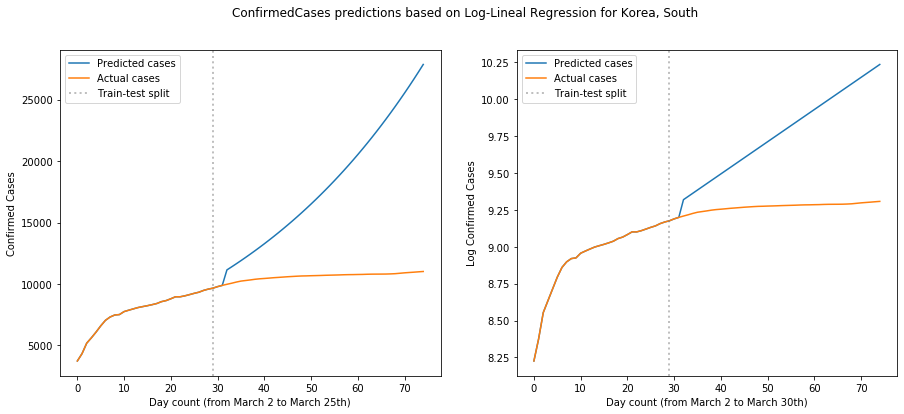

In [22]:
## To do ##  
dates_list2 = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13','2020-05-14']
plot_linreg_basic_country(data, "Korea, South", dates_list2, 39, 1, 70, 113)

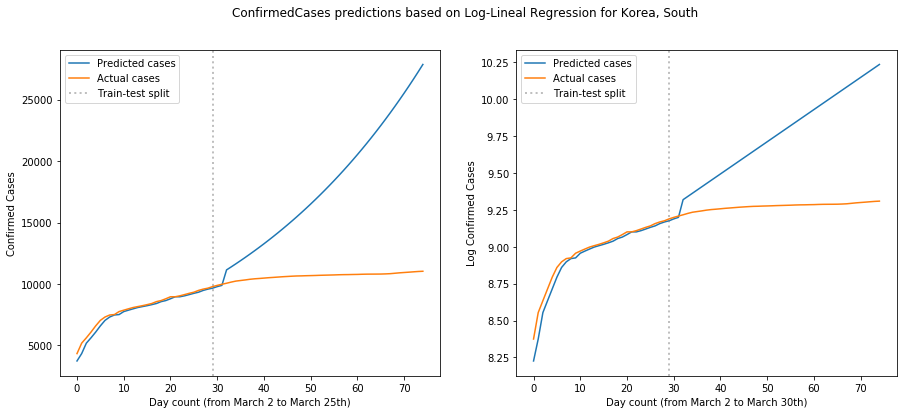

### <br/>Problem 2-4 Describe the significance and limitations of the graph above.

### YOUR ANSWER HERE ###

Linear regression의 결과 prediction의 log confirmed cases가 linear하게 나온 것으로 보아, 실제 confirmed cases는 exponential하게 증가할 것이라고 예측되었다고 볼 수 있다. 아마 10일차 정도부터 30일차 정도까지의 실제 confirmed cases가 exponential 그래프의 형태로 그려져서 그럴 것이라고 추측해 볼 수 있다.이 모델의 경우 트레이닝 데이터를 보면 Country_region 이나 Province_State은 모두 동일하므로 단순히 training data의 Day_num에 따른 confirmed cases의 추이를 따라가려는 경향이 있어서 저렇게 예측이 된것으로 보인다. 하지만 실제로는 확진자 수의 증가율이 오히려 더 감소해 오차가 크게 나타나고 있다. 코로나 바이러스의 경우 확진자 수가 날짜별로 일정하게 늘어나는 것이 아니라 정확한 예측을 위해서라면 단순히 날짜별로 추이를 나타내는 것이 아니라, 다른 다양한 feature들을 추가해 트레이닝을 한다면 더 좋은 결과를 얻을 수 있을 거라고 생각한다.

## 3. Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Look at the document above and learn about Stringency Index (not legacy stringency index!!)

## 3-1 Data filtering

In [23]:
#load csv file you care ("OxCGRT_latest.csv")
###YOUR CODE HERE###
df_three = pd.read_csv("data/OxCGRT_latest.csv")

In [24]:
#Filter rows with six unique countries by 'CountryName'
#('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)
###YOUR CODE HERE###
country_list = []
filtered = df_three.query('CountryName in ["Australia", "China", "Japan", "New Zealand", "Singapore", "South Korea"]')

In [25]:
#Drop columns you don't need
#print dataframe you care about
###YOUR CODE HERE###
#use columns : 

use = ['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']
del_col = []
for col in filtered.columns:
    if col not in use:
        del_col.append(col)
filtered = filtered.drop(del_col, axis =1)
print(filtered.head())

    CountryName      Date  C1_School closing  C1_Flag  C2_Workplace closing  \
947   Australia  20200101                0.0      NaN                   0.0   
948   Australia  20200102                0.0      NaN                   0.0   
949   Australia  20200103                0.0      NaN                   0.0   
950   Australia  20200104                0.0      NaN                   0.0   
951   Australia  20200105                0.0      NaN                   0.0   

     C2_Flag  C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
947      NaN                      0.0      NaN                            0.0   
948      NaN                      0.0      NaN                            0.0   
949      NaN                      0.0      NaN                            0.0   
950      NaN                      0.0      NaN                            0.0   
951      NaN                      0.0      NaN                            0.0   

     C4_Flag  C5_Close public transpor

## 3-2 Calculating Stringency Index

you can use some pakages to deal with 'nan' values

In [26]:
#stringency calculation
#step1 : calculate weight for a policy of general scope
###YOUR CODE HERE###
Nj = [3,3,2,4,2,3,2,2]
N9 = 4
sum = 0
for n in Nj:
    sum += 1/(n+1)
w = sum/8
print(w)

0.28541666666666665


In [27]:
#step2 : calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 
###YOUR CODE HERE###
C1 = filtered['C1_School closing']
G1 = filtered['C1_Flag']
C2 = filtered['C2_Workplace closing']
G2 = filtered['C2_Flag']
C3 = filtered['C3_Cancel public events']
G3 = filtered['C3_Flag']
C4 = filtered['C4_Restrictions on gatherings']
G4 = filtered['C4_Flag']
C5 = filtered['C5_Close public transport']
G5 = filtered['C5_Flag']
C6 = filtered['C6_Stay at home requirements']
G6 = filtered['C6_Flag']
C7 = filtered['C7_Restrictions on internal movement']
G7 = filtered['C7_Flag']
C8 = filtered['H1_Public information campaigns']
G8 = filtered['H1_Flag']
C9 = filtered['C8_International travel controls']
I = []
G = [G1,G2,G3,G4,G5,G6,G7,G8]
print(len(C1))
print(len(G[0]))
for d, c in enumerate([C1,C2,C3,C4,C5,C6,C7,C8]):
    i = 100 * (((c*(1-w))/Nj[d]).add(w*G[d],fill_value=0))
    I.append(i)
i9 = 100*C9/N9
I.append(i9)

813
813


In [28]:
#step3 : calculate stringency index I (up to 2 decimal points)
###YOUR CODE HERE###
pd.options.display.float_format = '{:.2f}'.format
tot = I[0].copy()
for j in range(1,9):
    tot = tot.add(I[j])
str_index = tot/9
print(len(str_index))

813


In [29]:
#step4 : make your stingency index array into dataframe(column name = 'my_StringencyIndex') and concat it(axis = 1) to the result of 1-1 
###YOUR CODE HERE###
filtered['my_StringencyIndex'] = str_index
print(filtered.head())

    CountryName      Date  C1_School closing  C1_Flag  C2_Workplace closing  \
947   Australia  20200101               0.00      nan                  0.00   
948   Australia  20200102               0.00      nan                  0.00   
949   Australia  20200103               0.00      nan                  0.00   
950   Australia  20200104               0.00      nan                  0.00   
951   Australia  20200105               0.00      nan                  0.00   

     C2_Flag  C3_Cancel public events  C3_Flag  C4_Restrictions on gatherings  \
947      nan                     0.00      nan                           0.00   
948      nan                     0.00      nan                           0.00   
949      nan                     0.00      nan                           0.00   
950      nan                     0.00      nan                           0.00   
951      nan                     0.00      nan                           0.00   

     C4_Flag  C5_Close public transpor

## Problem4. Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19
A **topic model** is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
 Please refer to [wikipedia](https://en.wikipedia.org/wiki/Topic_model#:~:text=In%20machine%20learning%20and%20natural,structures%20in%20a%20text%20body.) for detailed information.
- These documents were crawled from *twitter* with some *COVID-19* related keywords . All tweets are in English but have a lot of noisy information.
- In this problem, your goal is to cluster tweets according to the latent 'topics' with the statistical method, automatically. 


### Load the csv file using pandas library

In [30]:
df = pd.read_csv('data/covid_twitter.csv') #set your working directory
text_en = df['text']
print(df.shape)
print(df.head())

(36121, 2)
   Unnamed: 0                                               text
0           6  .@PatriceHarrisMD spoke with @YahooFinance abo...
1          14  #CoronaUpdate | Johns Hopkins University has s...
2          17  Singapore donates 40,000 test kits to the Phil...
3          28  Lockdowns, drones: Will things ever go back to...
4          30  Does the #COVID19 pandemic have you feeling ou...


### Problem 4-1 Text Preprocessing
First of all, you should process the documents so that the model will not be perturbed by the noisy information

**a. Remove the following characters with *'re'* module in each tweets**
- special characters ( # @ , . | ? ! )
- *COVID* relavant words (COVID19, coronavirus, coronaoutbreak)

In [31]:
### YOUR CODE HERE ###

pattern_one = re.compile('[#@,.|?!] | COVID19 | coronavirus | coronaoutbreak')
print(text_en.shape)
new = []
for tt in text_en:
    new.append(re.sub('[#@,.|?!]|COVID19|coronavirus|coronaoutbreak', '', str(tt)))
print(new[:5])

(36121,)
['PatriceHarrisMD spoke with YahooFinance about the  stimulus package making its way through Congress and how the healthcare landscape will change once the pandemic ends ', "CoronaUpdate  Johns Hopkins University has said it did not authorize the use of its logo on a report titled 'Covid19 for India Updates'\n\n(dtrips reports)  \n\n", 'Singapore donates 40000 test kits to the Philippines  ', 'Lockdowns drones: Will things ever go back to normal after  pandemic ', 'Does the  pandemic have you feeling out-of-control and overwhelmed Take control of your mental health when COVID-19 has taken control of you ']


**b. Remove the *stop words* in each tweets**

*Stop words* are words which should be filtered out before given to the model. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Stop_words#:~:text=In%20SEO%20terminology%2C%20stop%20words,save%20space%20in%20their%20databases.) for detailed information 
- First, you should download the stop word set from *nltk* module.

In [32]:
### NLP toolkit ###
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [33]:
### Download the set with this
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chaih\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
### check the set with this
stop_words = set(stopwords.words('english'))
print(stop_words)
"it" in stop_words

{'how', 'yourself', 'this', 'myself', 'shouldn', 'hadn', 'any', 'from', 'themselves', 'between', 'why', 'weren', 'my', "you're", 'but', "it's", 'no', 'for', 'ourselves', 'further', 'on', "hasn't", 'only', 'i', 'ma', 'were', 'couldn', 'doesn', 'her', 'did', 'by', 'here', 't', 'through', 'if', 'won', "you'll", "hadn't", 'or', 'been', 'theirs', 'before', 'll', 'at', 'as', 'have', "aren't", 'your', "she's", 'they', 'now', "mustn't", 'whom', 'himself', 'yours', 'because', "needn't", 'what', 'itself', 'mustn', "wasn't", "didn't", 'those', "mightn't", 'too', 'ain', "haven't", 'wasn', 'own', 's', 'yourselves', 'then', 'his', 'into', 'the', 'do', 'there', 'didn', 'them', 'once', 'in', 're', "shouldn't", 'shan', 'hasn', "you'd", 'out', 'wouldn', 'we', 'its', 'until', 'during', 'needn', 'under', "don't", 'most', 'down', 'can', 'their', 'more', "should've", 'our', 'above', 'an', 'few', 'had', 'other', 'having', 'who', "wouldn't", 'he', "won't", "isn't", 'has', 'me', 'off', 'below', 'will', 'not', 

True

**a. Update your set with some stop words which are not needed for modeling, you think.**

In [35]:
### YOUR CODE HERE ###
stop_words.update(["that's","there's","can't","cannot","could","he'd","here's","i'd","i'll","i'm","i've"])

**b. Remove stop words from the tweet dataset with your own stop words set**

In [36]:
### YOUR CODE HERE ###
final_words = []
for tt in new:
    semi = []
    for word in stop_words:
        tt = tt.replace(" "+word+" ", " ")
    final_words.append(tt)
print(final_words[:100])

['PatriceHarrisMD spoke YahooFinance  stimulus package making way Congress healthcare landscape change pandemic ends ', "CoronaUpdate  Johns Hopkins University said authorize use logo report titled 'Covid19 India Updates'\n\n(dtrips reports)  \n\n", 'Singapore donates 40000 test kits Philippines  ', 'Lockdowns drones: Will things ever go back normal  pandemic ', 'Does  pandemic feeling out-of-control overwhelmed Take control mental health COVID-19 taken control ', 'Management options: antivirals glucocorticoids novel treatments manage cytokine storm: Novel Coronavirus SARS-CoV-2 (COVID-19) Updated Overview Emergency Clinicians ', 'The Italian town Vo went harder testing  — paid We learn things bcpoli cdnpoli\n', 'We District 4 still support confront  region Our office remains open maintain physical distancing accordance orders Governor Public Health Officer ', 'Ontario’s food-security groups getting creative COVID-19 ', 'Today’s Alberta : 79 cases total 621 (12 ICU) 53 recovered Munici

### Problem 4-2 Convert the documents to a tf-idf matrix 
*TF-IDF* is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Please refer to [this](http://mlwiki.org/index.php/TF-IDF)
- Please use the results of 4-1
- First, transform your tweets dataset into tf-idf matrix using the module below
- Print your tf-idf matrix after converting it into *pandas.DataFrame* format
- Set your own hyperparams.

In [37]:
### scikit learn ###
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
### YOUR CODE HERE ###
tfidv = TfidfVectorizer().fit(final_words)
print(tfidv.transform(final_words).shape)
print(tfidv.transform(final_words).toarray())
temp = tfidv.transform(final_words).toarray()
df_tfidv = pd.DataFrame(temp)
print(df_tfidv.head())

(36121, 66228)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
   0      1      2      3      4      5      6      7      8      9      ...  \
0   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  ...   
1   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  ...   
2   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  ...   
3   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  ...   
4   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  ...   

   66218  66219  66220  66221  66222  66223  66224  66225  66226  66227  
0   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
1   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
2   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00  
3   0.00   0.00   0.00   0.00   0.00   0.00   0.00  

### Problem 4-3 Cluster the tf-idf matrix of tweets using the *K-Means* algorithm.
- Set your own hyperparams

In [39]:
### scikit learn ###
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

**a. Find an optimal value for the number of clusters using the *elbow method***
- Draw the plot for SSD(Sum of the Squared Distance) of *K-Means* algorithm by the number of clusters, K, as shown in the example


Example
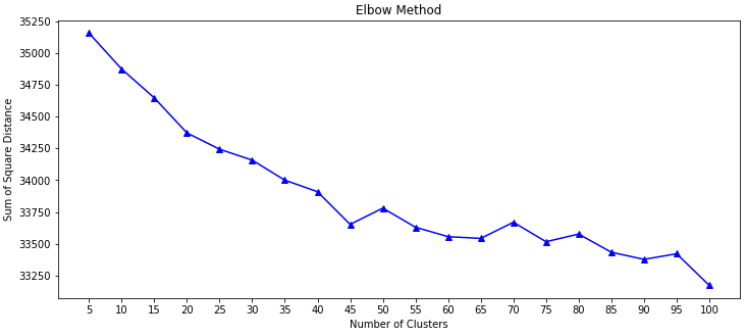

finished
464.9889235496521
35649.236795850724
finished
310.1756558418274
35389.66768512645
finished
376.0808017253876
35268.94972800166
finished
382.02200174331665
35190.8147384323
finished
424.1159071922302
35067.78259052758
finished
450.16893315315247
35010.430910163
finished
458.63298439979553
34949.95392143831
finished
420.0616557598114
34886.75186958306
finished
471.5691168308258
34857.37890329242
finished
423.65425419807434
34833.79251651218
finished
486.8967785835266
34726.37686713251
finished
608.9940674304962
34731.22976192117
finished
551.9801888465881
34677.583280259845
finished
438.3103737831116
34596.83347870801
finished
471.4492781162262
34638.32960674819
finished
502.3551404476166
34608.00664254884
finished
577.6060857772827
34603.89206034169
finished
482.72549653053284
34646.227571895106
finished
460.22189116477966
34630.047715653396
finished
395.13132524490356
34565.31805734672


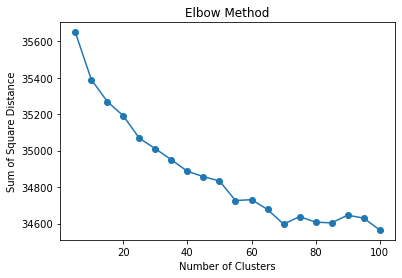

In [40]:
### YOUR CODE HERE ###
import time
K = range(5,101, 5)
#model = MiniBatchKMeans(5, batch_size=100)
#model.fit(df_tfidv)
#print(model.inertia_)
ssd = []
for k in K:
    start = time.time()
    model = MiniBatchKMeans(k, batch_size = 1000)
    model.fit(df_tfidv)
    ssd.append(model.inertia_)
    print("finished")
    print(time.time()-start)
    print(model.inertia_)
plt.plot(K, ssd,'-o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Square Distance")
plt.show()

**b. Based on the your plot above, pick a proper value for K and justify why.**

It is OK that you can't find any proper value for K. If not, specify why these are not proper.

**### YOUR DESCRIPTION HERE ###**
 
 

각각 6만 차원이 넘는 3만개 이상의 데이터를 mini batch 없이 돌리려니까 시간이 너무 오래 걸려서 batch_size를 1000으로 해서 돌려 보았는데 data의 수에 비해 batch_size가 작은 편이라, 랜덤 샘플을 어떻게 고르냐에 따라 sum of square distance가 k가 커짐에도 불구하고 더 증가를 하는 구간이 생기고 하는 것으로 보인다. 또한 batch_size가 작아 에러가 k가 커짐에도 많이 변하지 않는 것으로 보였다. 이 graph만을 두고 본다면 k가 약 60 정도일 때가 elbow point가 될것 같지만, k가 100일 때도 distance가 꽤 바뀌었고, 즉 감소량의 차이가 엄청 크지 않아 이 그래프의 추이로는 아직 elbow point에 도달하지 못했다고 볼 수도 있을 것 같다. 전체 데이터로 그래프를 그려본다면 더 의미 있는 결과가 나오지 않을까 싶다.

### Problem 4-4 Visualize your clusters to evaluate the results of clustering analysis.

**a. Assgin the cluster index for each tweet with K=14**
- In other words, predict the label for each example

In [41]:
### YOUR CODE HERE ###
model = MiniBatchKMeans(14, batch_size = 1000)
model.fit(df_tfidv)
pred = pd.DataFrame(model.predict(df_tfidv))
pred.columns = ['Predict']
print(pred)

       Predict
0            0
1            2
2            5
3            0
4           12
...        ...
36116       12
36117        5
36118        9
36119        4
36120        0

[36121 rows x 1 columns]


**b. Fill the function in below, which visualizes your clusters with PCA and TSNE**

Both *PCA* and *TSNE* are the most common visualization techniques in the machine learning community. It is usually known that TSNE could capture the non-linear relationship between datapoints than PCA. For more detailed information, please refer to [this](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- At first, this function randomly selects some samples for fitting PCA, depending on your device's capability.
- Get the PCA matrices from the results of 4-2(tf-idf matrix) where the number of principal components is 2, each.
- If you are uncomfortable with this function, you can make your own function to accomplish the same goal with this.

Example
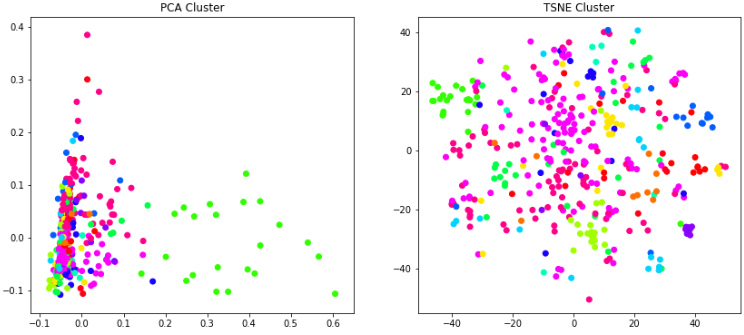

In [42]:
### visualization methods ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
### for plotting ###
import matplotlib.cm as cm

In [43]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    ######################## YOUR CODE HERE ########################
    '''
    pca (2000 x 2) : extract 2 eigenvectors that have the most explained variance
    tsne (2000 x 2) : feed the 50 principal components to t-SNE
                     For TSNE, you can use the TSNE().fit_transform() function.
    '''
    new_data = data.iloc[max_items]
    new_data = new_data.fillna(0)
    pca_mod = PCA(n_components = 2)
    tsne_pca = PCA(n_components = 50)
    tsne_mod = TSNE(n_components = 2)
    pca = pca_mod.fit_transform(new_data)
    tsne = tsne_mod.fit_transform(tsne_pca.fit_transform(new_data))

    #################################################################
    
    # random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset.iloc[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

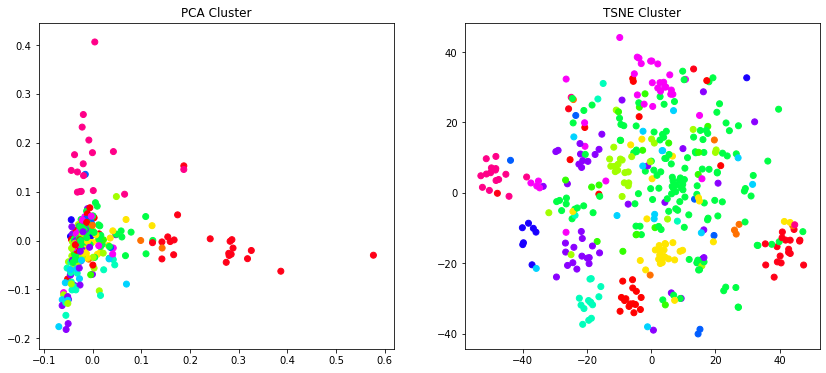

In [44]:
### YOUR CODE HERE ###
# plot PCA and t-SNE reduced data with above function
plot_tsne_pca(df_tfidv ,pred['Predict'] )

### Problem 4-5 Extract keywords from each clusters

**a. get the top keywords from each cluster you've got from 4-4 (a.), based on the tf-idf matrix values**

- Use the function in below or make your own function to achieve the same goal with this function.

Example
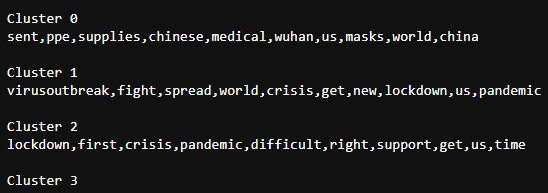

In [45]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    This function displays the top keywords based on tf-idf score.
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = top n keywords
    '''
    #  based on predictions
    df = pd.DataFrame(data).groupby(clusters).mean()
    
    # loop through each clusters and print top 10 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [46]:
### YOUR CODE HERE ###
get_top_keywords(temp, pred['Predict'], tfidv.get_feature_names(), 10)


Cluster 0
world,covid19,covid_19,us,people,health,global,coronavirus,the,pandemic

Cluster 1
the,negative,coronavirus,testing,people,cases,tests,test,tested,positive

Cluster 2
italy,deaths,first,the,coronavirus,people,died,toll,death,covid19

Cluster 3
covid_19,fight,spread,if,people,us,support,need,please,help

Cluster 4
us,you,every,re,covid_19,day,people,stop,they,one

Cluster 5
crisis,coronavirusoutbreak,china,lockdown,us,health,new,trump,people,coronavirus

Cluster 6
you,amp,spread,staying,people,covid_19,please,safe,home,stay

Cluster 7
people,ll,covid_19,together,amp,us,ve,need,re,we

Cluster 8
millions,deaths,100000,200000,us,dr,fauci,disease,year,old

Cluster 9
extended,president,extending,30th,trump,30,guidelines,april,social,distancing

Cluster 10
medical,china,trump,health,covid_19,people,us,coronavirus,the,amp

Cluster 11
the,quarantine,people,patients,lockdown,coronalockdown,this,coronaupdate,stayathomeandstaysafe,covid_19

Cluster 12
patients,cases,pandemic,people,covi

**b. According to the keywords selected from (a.), describe the differences between clusters or guess the topic of tweets in the specific cluster**

**### YOUR DESCRIPTION HERE ###**

Cluster 0는 world, global과 같은 단어들이 많이 나오는 것으로 보아, 코로나 바이러스가 pandemic 선언이 되고 세계적인 코로나 바이러스의 경향을 나타낸 것 같다.

Cluster 1은 negative, test, positive 이런 키워드들이 나오는 것으로 보아, 코로나 바이러스 검사 결과가 양성/음성으로 나오므로 코로나 바이러스의 검사와 관련된 트윗들 이라고 유추해 볼 수 있다.

Cluster 2는 Italy, deaths, died 이런 죽음과 관련된 키워드들이 많이 나오는 것으로 보아, 이탈리아에서 초기에 확진자 수가 엄청 늘었을 때 사망자가 많이 나와서 그거와 관련된 내용일 것 같다.

Cluster 3은 people, us, help, spread 이런 단어가 많이 나오는 것으로 보아, 모두 힘을 합쳐서 싸워야 이긴다는 그런 내용일 것 같다.

Cluster 4도 3과 비슷해 보인다.

Cluster 5는 crisis, china, trump 이런 단어들이 나오는 것으로 보아, 미국의 트럼프 대통령의 중국 언급에 관련한 내용들일 것 같다.

Cluster 6은 you, stay, spread, home 이런 단어들이 나오는데, 코로나 바이러스의 spread를 막기 위해 밖에 돌아다니지 말고 집에 있어 달라고 부탁하는 그런 내용의 트윗인 듯 하다.

Cluster 7도 3, 4와 같이 같이 이겨내자는 그런 내용일 것이라고 생각이 든다.

Cluster 8은 million과 관련된 숫자가 많이 나오는데 어떤 의미로 쓰였을지 잘 모르겠다.

Cluster 9는 president, trump, guidelines 이런 단어들이 있는데, 미국의 트럼프 대통령이 코로나에 대응하는 guideline이나 그런 대응 방식들에 관한 내용일 것 같다.

Cluster 10은 5와 비슷해 보인다.

Cluster 11은 lockdown, quarantine 이런 격리 관련 단어들이 나오는 것으로 보아 미국의 lockdown 관련 내용과 사람들이 밖에서 돌아다니지 않고 집에서 격리하도록 부추기거나 격려하는 이런 주제인 듯 하다.

Cluster 12는 patients, cases 이런 단어들이 나오는 것으로 보아, 세계의 환자 수 혹은 확진자 수에 대한 내용의 트윗들 일 것 같다.

Cluster 13은 reports, confirmed, deaths, new, cases 이런 단어들이 나오는 것으로 보아, 코로나 바이러스의 확진자 수, 사망자 수 등의 수치들과 관련한 report에 대한 내용인 듯 하다.

### End of HW4 ###
Thanks for all your works